In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [56]:
df = pd.read_csv("./data/final_final.csv")
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   year_film          591 non-null    int64         
 1   year_ceremony      591 non-null    int64         
 2   ceremony           591 non-null    int64         
 3   film               591 non-null    object        
 4   winner             591 non-null    bool          
 5   original_language  591 non-null    object        
 6   original_title     591 non-null    object        
 7   release_date       591 non-null    datetime64[ns]
 8   vote_average       591 non-null    float64       
 9   genre              591 non-null    object        
 10  rating             590 non-null    float64       
 11  duration           591 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 51.5+ KB


In [57]:
df[df["rating"].isna()]

,year_film,year_ceremony,ceremony,film,winner,original_language,original_title,release_date,vote_average,genre,rating,duration
7,1928,1929,2,The Patriot,False,en,The Patriot,1928-09-01,5.0,['Drama'],NaN,113.0


In [58]:
talkies = df[(df['year_film'] >= 1927) & (df['year_film'] <= 1938)]
mean_talkies = talkies["rating"].mean()
df["rating"].fillna(mean_talkies, inplace=True)
df['duration'] = df['duration'].str.strip("[]'").str.replace(',', '.').astype(float)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   year_film          591 non-null    int64         
 1   year_ceremony      591 non-null    int64         
 2   ceremony           591 non-null    int64         
 3   film               591 non-null    object        
 4   winner             591 non-null    bool          
 5   original_language  591 non-null    object        
 6   original_title     591 non-null    object        
 7   release_date       591 non-null    datetime64[ns]
 8   vote_average       591 non-null    float64       
 9   genre              591 non-null    object        
 10  rating             591 non-null    float64       
 11  duration           591 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 51.5+ KB


## Dividir las películas por eras

In [60]:
eras_bins = [1927, 1955, 1977, 2000, float('inf')]
eras_labels = ['Golden Era', 'The Change', 'Modern Era', 'New Millennium']

df['era'] = pd.cut(df['year_film'], bins=eras_bins, labels=eras_labels, right=False)

golden_era = df[df['era'] == 'Golden Era']
the_change = df[df['era'] == 'The Change']
modern_era = df[df['era'] == 'Modern Era']
new_millennium = df[df['era'] == 'New Millennium']

In [61]:
df.to_csv("./data/final_limpio.csv")

## To-do list

- [ ] Analizar la distribución de las fechas de lanzamiento de las películas nominadas y ganadoras.
- [ ] idiomas
- [ ] ratings / victoria
- [ ] duracion / victoria
- [ ] generos
- [ ] distribucion de la duracion
- [ ] Realizar comparaciones detalladas entre las películas de diferentes eras en términos de votación, duración, género, etc.
Identificar posibles cambios en las preferencias a lo largo de las eras.

### Comparación entre eras

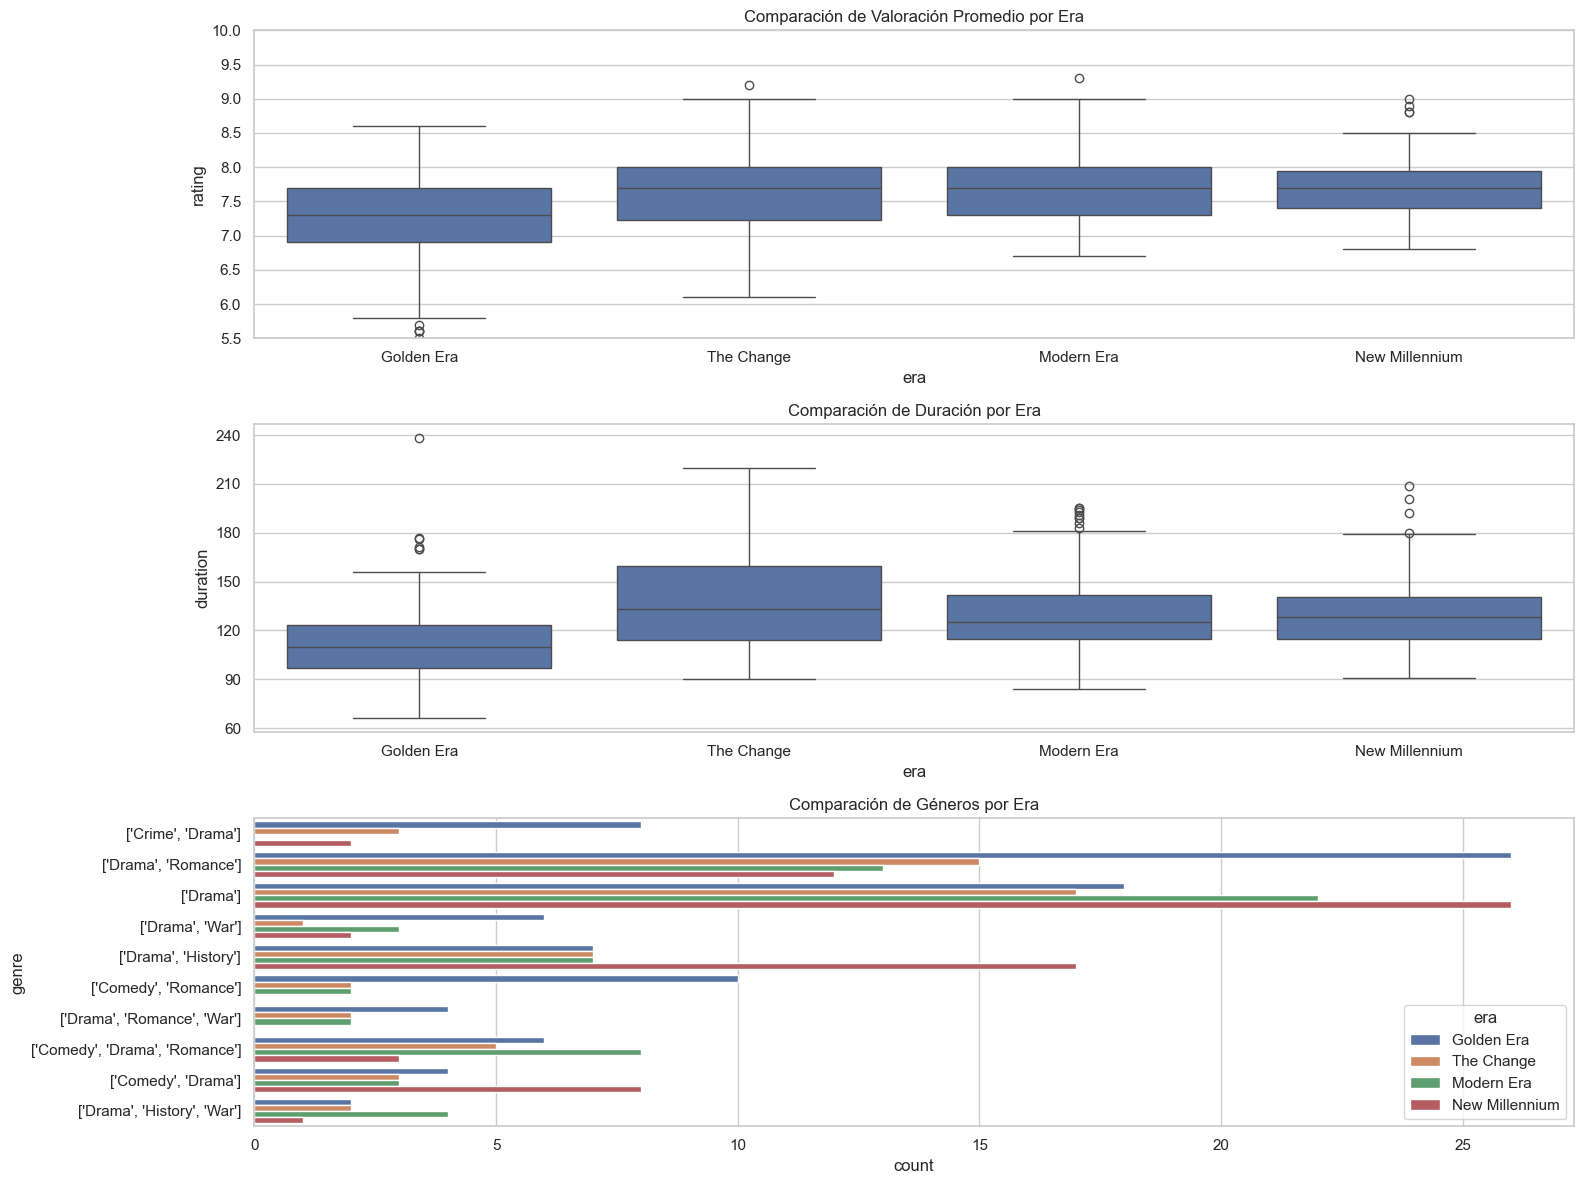

In [73]:
sns.set(style="whitegrid")

# Crear un conjunto de gráficos para comparar diferentes características entre eras
plt.figure(figsize=(16, 12))

# Comparación de Valoración Promedio
plt.subplot(3, 1, 1)
sns.boxplot(x='era', y='rating', data=df)
plt.ylim(df['rating'].min(),10)
plt.title('Comparación de Valoración Promedio por Era')

# Comparación de Duración
plt.subplot(3, 1, 2)
plt.yticks
sns.boxplot(x='era', y='duration', data=df)
y_min = df['duration'].min()
y_max = df['duration'].max()
plt.yticks(np.arange(np.floor(y_min/30)*30, np.ceil(y_max/30)*30 + 30, 30))
plt.title("Comparación de Duración por Era")

# Comparación de Géneros
plt.subplot(3, 1, 3)
genre_count = df['genre'].explode().value_counts().nlargest(10)  # Obtener los 10 géneros más comunes
sns.countplot(y='genre', hue='era', data=df[df['genre'].explode().isin(genre_count.index)], dodge=True)
plt.title('Comparación de Géneros por Era')


# Ajustar el diseño de los subgráficos
plt.tight_layout()
plt.show()

In [74]:
df.sample(10)

,year_film,year_ceremony,ceremony,film,winner,original_language,original_title,release_date,vote_average,genre,rating,duration,era
247,1965,1966,38,Ship of Fools,False,en,Ship of Fools,1965-07-29,6.524,"['Drama', 'Romance']",7.1,149.0,The Change
22,1931,1932,5,Grand Hotel,True,en,Grand Hotel,1932-05-25,6.960,"['Drama', 'Romance']",7.3,112.0,Golden Era
576,2021,2022,94,King Richard,False,en,King Richard,2021-11-18,7.699,"['Drama', 'History']",7.5,144.0,New Millennium
16,1930,1931,4,Skippy,False,en,Skippy,1931-04-25,6.176,"['Drama', 'Family', 'Comedy']",6.3,85.0,Golden Era
232,1962,1963,35,The Music Man,False,en,The Music Man,1962-06-19,7.113,"['Comedy', 'Family', 'Music', 'Romance']",7.7,151.0,The Change
321,1980,1981,53,The Elephant Man,False,en,The Elephant Man,1980-10-09,8.048,"['Drama', 'History']",8.2,124.0,Modern Era
21,1931,1932,5,Five Star Final,False,en,Five Star Final,1931-09-26,6.741,"['Crime', 'Drama']",7.3,89.0,Golden Era
271,1970,1971,43,Five Easy Pieces,False,en,Five Easy Pieces,1970-09-12,7.156,['Drama'],7.4,98.0,The Change
455,2007,2008,80,Atonement,False,en,Atonement,2007-09-07,7.651,"['Drama', 'Romance']",7.8,123.0,New Millennium
146,1945,1946,18,The Bells of St. Mary's,False,en,The Bells of St. Mary's,1945-12-27,6.872,"['Comedy', 'Drama']",7.2,126.0,Golden Era
